In [11]:
import pandas as pd

# dfe = pd.read_csv("data/archive/labelled_newscatcher_dataset.csv", delimiter=';')
df = pd.read_json("../data/archive/News_Category_Dataset_v2.json", lines=True)

In [12]:
df.dtypes


category                     object
headline                     object
authors                      object
link                         object
short_description            object
date                 datetime64[ns]
dtype: object

In [13]:
df.dtypes

category                     object
headline                     object
authors                      object
link                         object
short_description            object
date                 datetime64[ns]
dtype: object

In [14]:
len(df)

200853

In [15]:
df.sample(7)

,category,headline,authors,link,short_description,date
167960,WELLNESS,HAPIfork: Fork That Monitors Eating Speed Debu...,Amanda L. Chan,https://www.huffingtonpost.com/entry/hapifork-...,"If soup is your thing, they’re also working on...",2013-01-17
140194,PARENTING,9 Things Only a Mother Could Say,"Linda Wolff, Contributor\nParenting and pop cu...",https://www.huffingtonpost.com/entry/9-things-...,My Mother's 81st birthday is coming up soon. I...,2013-11-06
41576,ENTERTAINMENT,Andy Cohen Reveals Skin Cancer Diagnosis On 'L...,Leigh Blickley,https://www.huffingtonpost.com/entry/andy-cohe...,"Kelly Ripa urged the ""Watch What Happens Live""...",2016-11-25
71311,IMPACT,"Family Adopting 11th Child, Who Has Special Ne...","Charyn Levy, CrowdRise",https://www.huffingtonpost.com/entry/family-ad...,"At Christmas this year, Gigi will be home with...",2015-12-23
17896,QUEER VOICES,The 'Indoor Boys' Are On The Outs In This Week...,Curtis M. Wong,https://www.huffingtonpost.com/entry/indoor-bo...,Hell hath no fury like a gay roommate scorned.👬,2017-08-27
48254,HEALTHY LIVING,How I Overcame My Fear Of Alzheimer's Disease,"Esther Goldenberg, ContributorCoach",https://www.huffingtonpost.com/entry/how-i-ove...,"I used to be afraid of Alzheimer’s. Petrified,...",2016-09-11
84923,BLACK VOICES,"Azealia Banks Slams VMAs, Says 'America Doesn'...",Aaron Barksdale,https://www.huffingtonpost.com/entry/azealia-b...,Azealia Banks is once again speaking up about ...,2015-07-23


Chapter 14.2: Data Range


<Axes: >

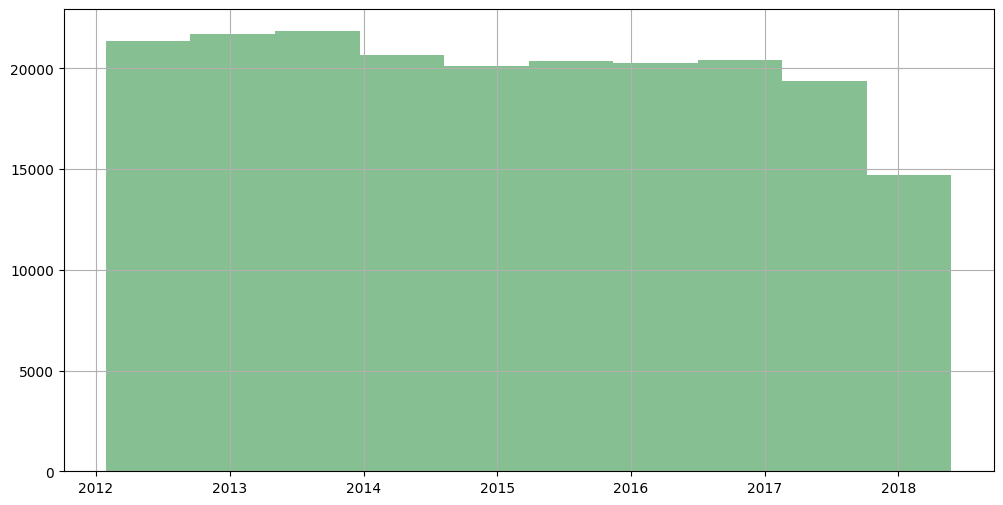

In [16]:
df.date.hist(figsize=(12,6), color='#86bf91')

Chapter 14.3: Category Distribution


In [17]:
len(set(df.category))

41

<Axes: xlabel='category'>

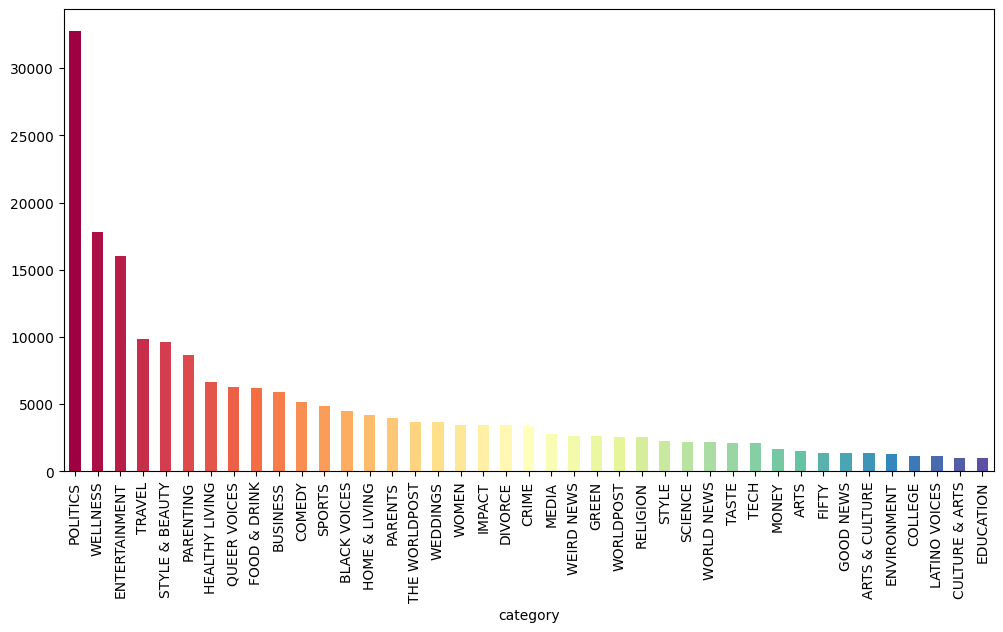

In [18]:
import matplotlib
import matplotlib.cm
import numpy as np

cmap = matplotlib.colormaps.get_cmap('Spectral')
rgba = [cmap(i) for i in np.linspace(0, 1, len(set(df.category)))]
df.category.value_counts().plot(kind='bar', figsize=(12,6), color=rgba)

Chapter 14.4 Texts for Classification


In [19]:
df_orig = df.copy()
# df = df_orig[df_orig.category.isin(['POLITICS', 'ARTS', 'QUEER VOICES', 'BUSINESS', 'CRIME'])]
print(df.shape)

(200853, 6)


<Axes: xlabel='category'>

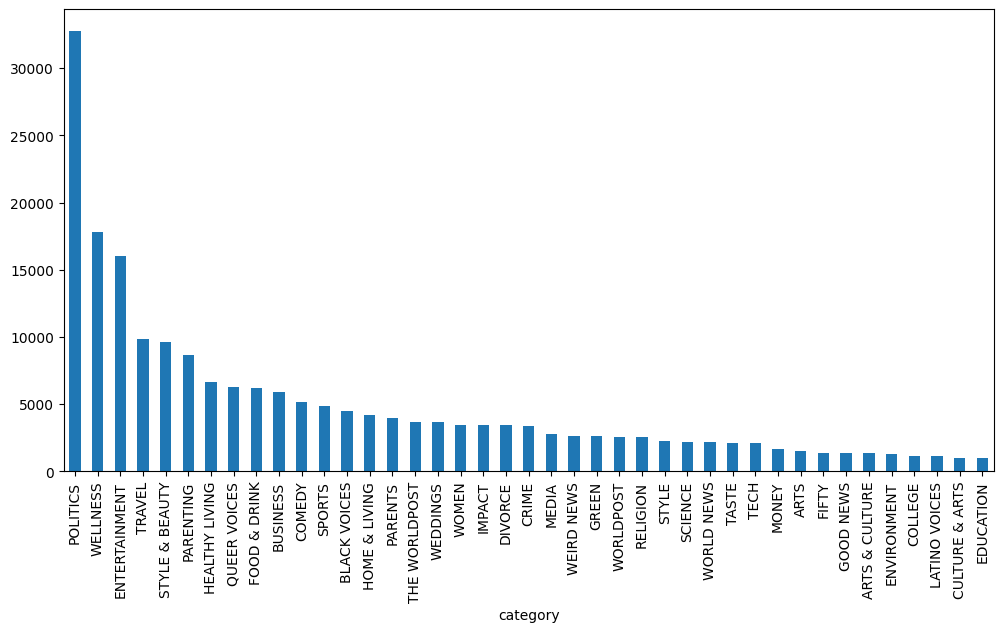

In [20]:
df.head()
df2 = df.loc[:, ['category', 'headline']]
df2.category.value_counts().plot(kind='bar', figsize=(12,6))

Chapter 14.5: Vectorize


Text Vectorization is the process of converting text into numerical representation

1. Binary Term Frequency: 
    -> BTF captures presence (1) or absence (0) of term in document

2. Bag of Words:
    -> BoW Term Frequency captrues frequency of a term in the document. This is unlike BTF, which only captures whether a term is in the doc or not 

In [21]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

sample_doc = ["Hello I am a boy", "Hello I swim", "My name is Jack"]
cv = CountVectorizer(max_df=0.85)
word_count_vector = cv.fit_transform(sample_doc)
word_count_vector_arr = word_count_vector.toarray()
pd.DataFrame(word_count_vector_arr, columns=sorted(cv.vocabulary_, key=cv.vocabulary_.get))

,am,boy,hello,is,jack,my,name,swim
0,1,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,1
2,0,0,0,1,1,1,1,0


In [22]:
# Wrong Example
pd.DataFrame(word_count_vector_arr, columns=sorted(cv.vocabulary_))

,am,boy,hello,is,jack,my,name,swim
0,1,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,1
2,0,0,0,1,1,1,1,0


In [23]:
cv.vocabulary_


{'hello': 2,
 'am': 0,
 'boy': 1,
 'swim': 7,
 'my': 5,
 'name': 6,
 'is': 3,
 'jack': 4}

Chapter 14.6: CountVectorizer

In [24]:
docs = df['category'].tolist()
# create a vocabulary of words
# ignore words that appear in 95% of documents
cv = CountVectorizer(max_df=0.95)
word_count_vector = cv.fit_transform(docs)
list(cv.vocabulary_.keys())

['crime',
 'entertainment',
 'world',
 'news',
 'impact',
 'politics',
 'weird',
 'black',
 'voices',
 'women',
 'comedy',
 'queer',
 'sports',
 'business',
 'travel',
 'media',
 'tech',
 'religion',
 'science',
 'latino',
 'education',
 'college',
 'parents',
 'arts',
 'culture',
 'style',
 'green',
 'taste',
 'healthy',
 'living',
 'the',
 'worldpost',
 'good',
 'fifty',
 'wellness',
 'parenting',
 'home',
 'beauty',
 'divorce',
 'weddings',
 'food',
 'drink',
 'money',
 'environment']

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [26]:
df['category_is_crime'] = [i == 'CRIME' for i in df.category]
X_train, X_test, Y_train, y_test = train_test_split(word_count_vector, df.category_is_crime, test_size=0.2, random_state=42)

In [27]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
y_pred = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = (np.trace(cm)) / sum(sum(cm))
print('Accuracy of a simple Linear Model with CountVectorizer:  {:.2f}%'.format(acc * 100))


[[39521     0]
 [    0   650]]
Accuracy of a simple Linear Model with CountVectorizer:  100.00%


Chapter 14.7: TF_IDF


In [28]:
tfidf = TfidfTransformer(smooth_idf=True, use_idf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
model1.fit(X_train_tfidf, Y_train)
X_test_tfidf = tfidf.transform(X_test)
y_pred = model1.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = (np.trace(cm)) / sum(sum(cm))
print('Accuracy of a simple Linear Model with TfidfVectorizer:  {:.2f}%'.format(acc * 100))



[[39521     0]
 [    0   650]]
Accuracy of a simple Linear Model with TfidfVectorizer:  100.00%


Chapteer 14.8: Feature Extraction with TF-IDF

In [40]:
## Imprtant Keywords extraction using TF-IDF
print(df.iloc[1].headline)
vector = cv.transform([df.iloc[1].headline])
tfidf_vector = tfidf.transform(vector)

coo_matrix = tfidf_vector.tocoo()

tuples = zip(coo_matrix.col, coo_matrix.data)
sorteed_tuple = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

[ (cv.get_feature_names_out()[i[0]], i[1]) for i in sorteed_tuple]

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song


[('world', 0.7410399399059038), ('the', 0.6714609500665354)]

In [39]:
## Important Keywords extraction using TF-IDF
print(df.iloc[541].headline)
vector = cv.transform([df.iloc[541].headline])
tfidf_vector = tfidf.transform(vector)

coo_matrix = tfidf_vector.tocoo()

tuples = zip(coo_matrix.col, coo_matrix.data)
sorteed_tuple = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

[ (cv.get_feature_names_out()[i[0]], i[1]) for i in sorteed_tuple]

Pauley Perrette Responds To CBS Statement About Her 'Multiple Assaults' Claim


[]

In [31]:
comedy_1 =df[df.category == 'COMEDY'].iloc[0].headline
print(comedy_1)

Trump's New 'MAGA'-Themed Swimwear Sinks On Twitter


In [38]:
vector = cv.transform([comedy_1])
tfidf_vector = tfidf.transform(vector)

coo_matrix = tfidf_vector.tocoo()

tuples = zip(coo_matrix.col, coo_matrix.data)
sorteed_tuple = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

[ print(cv.get_feature_names_(i[0]), i[1]) for i in sorteed_tuple]

[]